•features - наименовыния признаков

•w_init - вектор начальных весов модели

•eta - шаг градиентного спуска (по умолчанию 0.001)

•max_iter - максимальное число итераций градиентного спуска (по умолчанию 100)

•max_weight_dist - минимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска, при котором алгоритм прекращает работу (по умолчанию 1e-4)

•seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)

•verbose - флаг печати информации (например, для отладки, по умолчанию False)

In [1]:
import numpy as np
import pandas as pd
from time import time

from thbmodel.utils import timestamp, YEAR, MONTH,settings
from thbmodel.utils.arrayview import ArrayView, TimeseriesView

from thbmodel.prediction.models.fit_model import TSModel
from thbmodel.prediction.models.model_parameters import ModelParameters
from thbmodel.prediction.models.factor_management import FactorList
from thbmodel.prediction.models.preprocessing import load_slices

from thbmodel.prediction.models.prediction import factornames_trimmed
from thbmodel.prediction.models.parameters import factor_build_end

import thbmodel.prediction.models.St_gradient as sg 

In [2]:
av = ArrayView.from_file(settings.paths.join('racing_data_azd.av.bcolz'))
tsav = load_slices()

In [3]:
build_end =float(timestamp('2016-04-01'))
oos_start =float(timestamp('2017-05-01'))
pars = ModelParameters(av, build_end =build_end, oos_start =oos_start, depth=1, lmbd=10, verbose=False)

In [4]:
fl = FactorList.from_av(av, factornames_trimmed)
fl.preprocess(pars)
factors = fl.asmatrix()
print 'is1_start  ',(timestamp(av.start_time[pars.is1][0]))
print 'is1_end  ',(timestamp(av.start_time[pars.is1][-1]))
print 'oos_start  ',(timestamp(av.start_time[pars.oos][0]))
print 'oos_end  ',(timestamp(av.start_time[pars.oos][-1]))

is1_start   2016-04-01 12:40:00.000000
is1_end   2017-04-30 16:45:00.000000
oos_start   2017-05-01 12:30:00.000000
oos_end   2017-08-20 15:00:00.000000


In [5]:
import pandas as pd
pd.set_option('display.max_columns', 90)
n,m = factors.shape
col_names = ['f{}'.format(i) for i in range(1,n+1)]

df = sg.DF (pars.model_mask, factors, av, col_names, ['event_id', 'result'])
df['is1'] = pars.is1 [pars.model_mask]
df['is2'] = pars.is2 [pars.model_mask]
df['oos'] = pars.oos [pars.model_mask]


df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,event_id,result,is1,is2,oos
0,0.367198,-2.822814,1.042788,-1.449000,-0.399689,1.519560,1.120796,-0.903438,2.149808,0.454737,0.397418,2.018940,-0.041120,-1.864951,0.903440,-0.595091,-2.351100,0.791641,-0.371619,-0.134965,0.383271,-1.827844,-0.662651,1.423997,0.518412,0.633018,-0.217998,-0.046744,1.832861,0.362147,1.789398,0.713323,0.847637,2.197710,0.333612,0.992382,2.005222,1.745112,-2.169849,0.024419,0.516602,0.838355,-0.231825,0.510499,-0.818574,1.690850,1.153778,0.0,-0.178424,1.606775,1.276101,0.903439,-0.903432,1.539463,307976,4,True,True,False
1,0.367198,-2.822814,1.146508,-0.950907,0.134657,1.279091,0.709838,0.511180,1.163663,0.554670,0.589283,2.676868,-0.853920,-1.762160,-0.511180,0.355150,0.325790,-0.024739,0.462871,0.297558,1.503070,-1.925740,-0.642401,2.296713,-0.518494,1.678214,-0.325527,0.081803,-0.721549,3.691803,1.126171,1.576948,0.329637,0.138260,1.866920,1.105528,1.685527,1.745112,-1.926777,0.024419,-0.399449,0.838355,1.043211,0.510499,-0.881552,0.215314,0.760771,0.0,-0.103089,1.421764,0.382060,-0.511180,0.511188,-0.341251,307976,1,True,True,False
2,0.367198,-2.269686,1.109573,1.041469,-1.246235,0.959507,0.533713,-0.834292,2.054531,0.589805,0.781147,-0.425354,-0.308430,-1.495752,0.834292,-0.561211,0.570014,-1.385371,0.230456,0.295614,0.221700,-1.316387,-1.368199,0.486579,1.954420,0.373406,-0.280811,0.210350,0.824291,0.099820,0.924145,0.695130,0.329637,-2.094361,0.463911,1.114437,1.611524,1.745112,-1.271665,-0.100011,-0.118486,-1.065489,-0.231825,0.510499,2.544475,-0.108367,-0.777575,0.0,-0.034824,0.366740,0.442908,0.834292,-0.834286,0.687687,307976,2,True,True,False
3,0.367198,-2.082636,-0.546706,1.041469,-0.177928,0.807879,1.825297,0.377624,-0.891473,2.359050,0.690858,-1.025506,2.586447,-1.542717,-0.377623,0.483454,0.439499,-1.929624,-0.011781,0.218581,1.028220,-0.193052,-0.390140,-0.525911,0.543346,0.061765,-0.134161,0.210350,-1.481083,-1.201241,-0.343101,-0.052652,-0.188364,0.024540,-0.598031,-0.847758,1.648525,1.745112,-0.854125,-0.057719,-0.967518,-1.950998,-0.231825,0.510499,-0.705213,-0.063721,0.946241,0.0,0.028652,0.979326,3.985849,-0.377623,0.377629,1.750346,307976,5,True,True,False
4,0.367198,-1.620791,0.904502,1.041469,-0.645139,0.037615,-0.229496,-0.471971,1.330716,1.717160,0.167181,-0.232777,-0.308430,-0.513871,0.471972,-0.296116,0.195127,-1.385371,0.358433,0.311468,1.782793,-1.105682,-0.162607,-0.525911,1.667236,1.301977,-0.517036,0.210350,0.340718,4.356093,0.522335,1.517120,-0.188364,-1.785856,1.200810,0.854792,0.270584,1.745112,-0.640691,0.049978,-0.749274,-0.453683,-0.231825,0.510499,2.587987,-0.043631,1.434019,0.0,-0.145211,1.003482,0.699005,0.471972,-0.471966,0.365180,307976,8,True,True,False


In [6]:
from sklearn.decomposition import PCA
seed =7
n_components = 47
pca = PCA(n_components =n_components, random_state =seed)
name_pca = ['pca_f%s'%i for i in range(1, n_components+1)]

df_pca = pd.DataFrame(data = pca.fit_transform(df.loc[:,col_names]), columns =name_pca) 
#df_pca.head()
df_pca['event_id'] = df['event_id']
df_pca['result'] = df['result']
df_pca['is1'] = df['is1']
df_pca['oos'] = df['oos']
df_pca.head()

,pca_f1,pca_f2,pca_f3,pca_f4,pca_f5,pca_f6,pca_f7,pca_f8,pca_f9,pca_f10,pca_f11,pca_f12,pca_f13,pca_f14,pca_f15,pca_f16,pca_f17,pca_f18,pca_f19,pca_f20,pca_f21,pca_f22,pca_f23,pca_f24,pca_f25,pca_f26,pca_f27,pca_f28,pca_f29,pca_f30,pca_f31,pca_f32,pca_f33,pca_f34,pca_f35,pca_f36,pca_f37,pca_f38,pca_f39,pca_f40,pca_f41,pca_f42,pca_f43,pca_f44,pca_f45,pca_f46,pca_f47,event_id,result,is1,oos
0,5.857060,3.960110,1.197776,1.509141,1.548961,0.229756,-2.092466,-0.768923,1.843824,0.526431,0.141392,-1.895666,-0.997830,-1.259986,-1.666113,1.161771,0.423352,-0.655191,0.086684,0.069927,1.291780,-0.248330,0.097110,-0.633195,0.923213,-0.092589,-0.100181,-0.039764,0.091530,-0.006046,-0.572252,1.090489,-0.281813,-0.043857,-0.110201,-0.235521,1.048968,-0.379104,0.083641,-0.652423,0.341189,0.372509,0.131216,-0.188307,-0.180405,0.017501,-0.121157,307976,4,True,False
1,7.704167,-0.451885,-0.975158,-0.044870,-0.601668,1.359202,-0.470939,-1.366731,1.606000,-0.411714,-0.646616,-0.183469,-0.611795,-0.996634,-1.696452,-0.217500,-0.700865,0.479980,-0.578627,0.113507,0.248621,0.650738,-1.092617,-0.859617,0.596831,-0.542108,-0.188002,-0.807099,-0.342783,-0.021958,-0.451120,0.618254,-0.538517,-0.073784,0.038227,0.927769,-0.370118,0.068530,-0.163859,-0.052606,-0.397528,0.087951,-0.312525,-0.406633,-0.405972,0.235588,0.380937,307976,1,True,False
2,3.837558,1.400571,0.357207,1.513080,1.364170,-1.127538,0.577371,2.138063,-1.049425,1.157921,2.134747,1.155988,-0.967698,1.008603,-1.733491,0.660901,-1.574509,0.294261,-0.613549,0.443753,-0.761914,1.604995,-0.057513,-1.161466,-0.051578,0.223283,-1.698734,0.006007,-0.490987,-0.881975,-0.370787,-0.214363,-0.406561,0.256742,0.320433,0.369017,1.695597,0.032526,-0.009471,0.090363,0.223611,0.030168,0.307682,0.252193,-0.119350,0.365714,-0.065368,307976,2,True,False
3,2.060212,-0.426516,2.314128,0.565045,0.520191,-0.959138,-2.140019,3.376900,-0.935472,2.816953,1.963168,0.109417,0.421464,-2.046681,-1.651683,-1.256548,0.425252,0.931787,-0.287671,-0.063660,-0.275034,-1.734383,-1.496649,2.299499,-0.999995,-0.696007,-0.117361,-0.369490,-1.265718,-0.736710,0.570268,1.275966,0.311797,0.217195,0.411096,1.510822,-0.745250,-0.535749,-0.494792,0.792972,-0.313527,0.289259,-0.087767,0.134060,-0.464869,0.482796,-0.404116,307976,5,True,False
4,5.197154,0.231656,-3.373365,-1.237842,1.389280,-1.186405,0.662654,1.852243,-0.696708,0.636053,1.147252,0.863740,0.870212,0.867187,-1.779064,-0.650132,-0.629182,1.284434,-0.649957,0.986610,-1.023873,1.173657,0.011262,-0.551504,-0.355210,-0.104547,-0.216697,0.266577,-0.474842,0.085959,0.538230,0.288889,0.343228,-0.153336,0.357224,0.003242,1.197687,-0.092582,-0.312634,-0.312359,-0.093204,-0.141603,-0.083421,0.246759,0.268570,0.730237,-0.009957,307976,8,True,False


In [7]:
df_pca['event_id'].groupby(df_pca['event_id']).count().max()

44

In [8]:
import time
start = time.time()
df_train_t, winner_tr_t, t_len_tr = sg.DF_to_tensor(df_pca.loc[df_pca.is1.values,:], name_pca)
df_test_t, winner_ts_t, t_len_ts = sg.DF_to_tensor(df_pca.loc[df_pca.oos.values,:], name_pca)
end = time.time()
print 'DataFrame to tensors {}'.format(end -start)

DataFrame to tensors 24.7351679802


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
b_size =1000
N_epoh = 12000/b_size +2
print N_epoh

14


In [11]:
import time
start = time.time()
rang =2
SGD_f_M = sg.AdaMax_factorize_T (df_pca.loc[df_pca.is1.values,:], name_pca,\
                                 rang =rang, b_size =1000, eta =1e-3,\
                          moment1 =0.9, moment2 =0.99, la =0.5,\
                          N_epoh =10,  max_iter =100, verbose =True)
end = time.time()
print 'Time taken to stohastic gradient {}'.format(end - start)

epoh 0  iteration  50  dist 0.0344553150799  V [-0.02112796 -0.01172561]
epoh 0  iteration  100  dist 0.0212734466413  V [-0.0163769  -0.02914961]
epoh 1  iteration  150  dist 0.0235253886751  V [-0.02478202 -0.0154458 ]
epoh 1  iteration  200  dist 0.00953834630686  V [-0.03289888 -0.0115139 ]
epoh 2  iteration  250  dist 0.0207310878707  V [-0.00230134  0.01241968]
epoh 2  iteration  300  dist 0.00808625703523  V [ 0.00233968 -0.00152908]
epoh 3  iteration  350  dist 0.0190204242971  V [ 0.00700893 -0.00612553]
epoh 3  iteration  400  dist 0.00939936658381  V [ 0.00602932 -0.00627605]
epoh 4  iteration  450  dist 0.0153088267169  V [ 0.00236389  0.00308793]
epoh 4  iteration  500  dist 0.00378676975227  V [ 0.006401    0.00612365]
epoh 5  iteration  550  dist 0.0164956154191  V [ 0.01231294 -0.00238047]
epoh 5  iteration  600  dist 0.0031583830485  V [ 0.00846134 -0.0046481 ]
epoh 6  iteration  650  dist 0.0162784041226  V [-0.01023749  0.00475641]
epoh 6  iteration  700  dist 0.0176

In [12]:
import time
start = time.time()
rang =2
SGD_f = sg.Adam_factorize_T (df_pca.loc[df_pca.is1.values,:], name_pca, \
                          rang =rang, b_size =1000, eta =1e-3,\
                          moment1 =0.9, moment2 =0.99, la =0.5,\
                          N_epoh =10,  max_iter =100, verbose =True)
end = time.time()
print 'Time taken to stohastic gradient {}'.format(end - start)

epoh 0  iteration  50  dist 1.1330648839  V [-0.32538932  0.10166058]
epoh 0  iteration  100  dist 0.170588723734  V [-0.30297992  0.05500095]
epoh 1  iteration  150  dist 0.224536533623  V [-0.27683846 -0.0037115 ]
epoh 1  iteration  200  dist 0.82232578673  V [-0.24715419 -0.08746033]
epoh 2  iteration  250  dist 0.429437301585  V [-0.2128865  -0.19933462]
epoh 2  iteration  300  dist 1.0504953305  V [-0.17674204 -0.1778001 ]
epoh 3  iteration  350  dist 0.315400830899  V [-0.13338537 -0.14371705]
epoh 3  iteration  400  dist 0.103888070806  V [-0.07783731 -0.10715062]
epoh 4  iteration  450  dist 0.194693582479  V [-0.02056399 -0.06473495]
epoh 4  iteration  500  dist 0.227438978992  V [ 0.02817633 -0.06148771]
epoh 5  iteration  550  dist 0.179828300443  V [ 0.05739447  0.00311784]
epoh 5  iteration  600  dist 0.104965185479  V [ 0.03084443  0.00944241]
epoh 6  iteration  650  dist 0.133933765366  V [-0.00814819 -0.01859995]
epoh 6  iteration  700  dist 0.157529622688  V [-0.021732

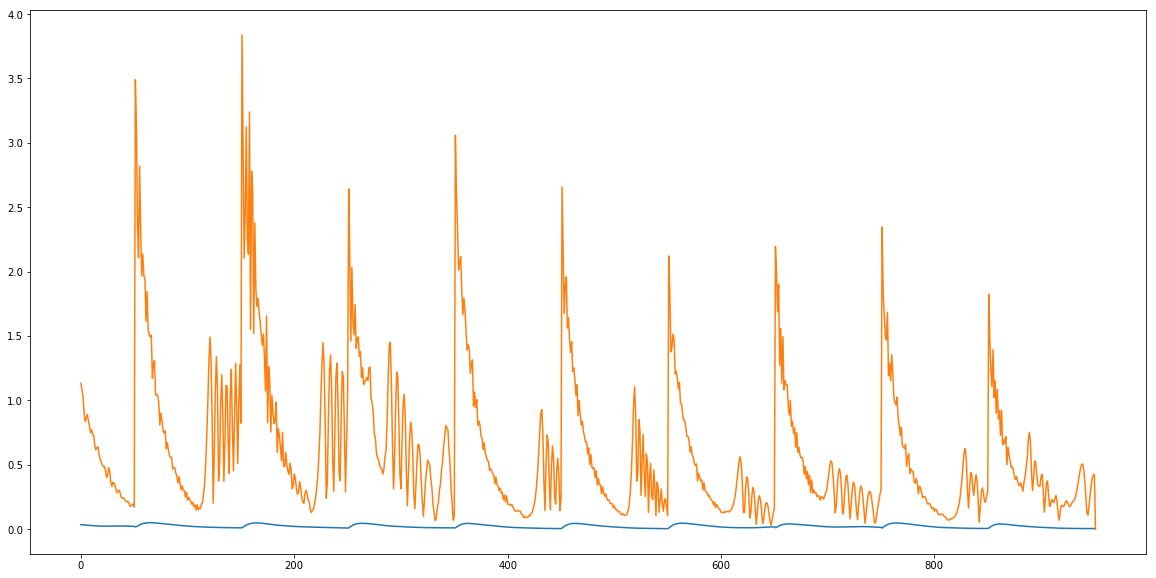

0.0045322118699
0.421476622317


In [13]:
plt.figure(figsize=(20, 10))
plt.plot(SGD_f_M[1][50:])
plt.plot(SGD_f[1][50:])

plt.show()#indexing-view-versus-copy
print SGD_f_M[1][SGD_f_M[1] >0][ -1]
print SGD_f[1][SGD_f[1] >0][ -1]

In [14]:
n = len(name_pca)

w = SGD_f_M[0][:n] # return to original shape
V = SGD_f_M[0][n:].reshape(rang, n).T

In [18]:
def LL_t_f (df_t, winner, w, V):
    
    S = np.einsum('nij, j -> ni', df_t,w) + np.einsum('nij, jr, kr, nik  -> ni', df_t,V,V,df_t)/2 - \
            np.einsum('nij, jr, jr, nij  -> ni', df_t,V,V,df_t)/2
    S = np.where(np.isnan(S), -np.inf, S)
    p = softmax(S)  
    LL = np.log(np.einsum('ni, ni -> n', p, winner)).mean()
    
    return LL

In [22]:
import imp
imp.reload(sg)

<module 'thbmodel.prediction.models.St_gradient' from 'thbmodel/prediction/models/St_gradient.py'>

In [23]:
start = time.time()
likelihood = sg.LL_t_f (df_train_t, winner_tr_t, w, V)
end = time.time()
print 'count ll for train data {} AdaMax F'.format(end -start)
print likelihood

count ll for train data 18.1605598927 AdaMax F
-1.94757784611


In [24]:
start = time.time()
likelihood = sg.LL_t_f (df_test_t, winner_ts_t, w, V)
end = time.time()
print 'count ll for test data {} AdaMax F'.format(end -start)
print likelihood

count ll for test data 5.81248807907 AdaMax F
-1.96279203222


In [ ]:
n = len(name_pca)

w = SGD_f[0][:n] # return to original shape
V = SGD_f[0][n:].reshape(rang, n).T

In [25]:
start = time.time()
likelihood = sg.LL_t_f (df_train_t, winner_tr_t, w, V)
end = time.time()
print 'count ll for train data {} Adam F'.format(end -start)
print likelihood

count ll for train data 18.5302910805 Adam F
-1.94757784611


In [26]:
start = time.time()
likelihood = sg.LL_t_f (df_test_t, winner_ts_t, w, V)
end = time.time()
print 'count ll for test data {} Adam F'.format(end -start)
print likelihood

count ll for test data 6.08622598648 Adam F
-1.96279203222


In [27]:
ev_l = np.unique(av.event_id)

In [54]:
b_s =10
a = 2
ev_l[(a-1)*b_s : (a)*b_s] - ev_l[10: 20]#ev_l[-(a)*b_s : -(a-1)*b_s] - ev_l[-20: -10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
ev_l[-20: 0]

array([], dtype=int64)

In [44]:
-(a-1)*b_s

0